# Proyek Analisis Data: Bike Sharing
- Nama: Andre Saputra Ginting
- Email: andresaputra260604@gmail.com
- Id Dicoding: andresaputra26

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada tahun berapa permintaan penyewaan sepeda terbanyak?
- Pertanyaan 2 : Pada bulan apa saja permintaan penyewaan sepeda biasanya mencapai puncaknya?
- Pertanyaan 3 : Pada Kuartil apa saja permintaan penyewaan sepeda biasanya mencapai puncaknya?
- Pertanyaan 4 : Pada bulan apa saja yang memiliki permintaan penyewaan sepeda paling sedikit dan paling banyak?
- Pertanyaan 5 : Pada hari apa saja yang memiliki permintaan penyewaan sepeda paling sedikit dan paling banyak?
- Pertanyaan 6 : Pada jam apa saja yang memiliki permintaan penyewaan sepeda paling sedikit dan paling banyak?
- Pertanyaan 7 : Pada musim berapa saja yang memiliki permintaan penyewaan sepeda paling sedikit dan paling banyak?
- Pertanyaan 8 : Pengaruh permintaan penyewaan sepeda berdasarkan cuaca?
- Pertanyaan 9 : Saat suhu temperatur apa yang mempengaruhi permintaan penyewaan sepeda? (Result Binning)

## Menyiapkan semua library yang dibutuhkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

**Insight:**
- Kode ini digunakan untuk **mengimpor data** agar dapat dianalisis lebih lanjut menggunakan Python berarti membaca file **`day.csv`** dan **`hour.csv`** lalu menyimpannya dalam **DataFrame** menggunakan library **pandas**.  
- `day_df` → Menyimpan data dari **day.csv** (kemungkinan berisi data harian).  
- `hour_df` → Menyimpan data dari **hour.csv** (kemungkinan berisi data per jam).  



In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Code ini digunakan untuk menampilkan 5 baris pertama dari dataset harian (day_df)
- Dataset ini mencatat penggunaan sepeda harian dengan variabel terkait waktu (`dteday`), kondisi cuaca (`weathersit`, `temp`, `hum`, `windspeed`), serta jumlah pengguna (`casual`, `registered`, `cnt`).  
-Beberapa kolom utama untuk analisis:  
   - **`cnt`** merepresentasikan total pemakaian sepeda per hari.  
   - **`season`, `holiday`, dan `workingday`** berperan dalam mengidentifikasi pola penggunaan.  
   - **`weathersit`** dapat menunjukkan pengaruh kondisi cuaca terhadap jumlah pemakaian.  
- Adanya perbedaan antara pengguna **casual** dan **registered** bisa memberikan wawasan lebih lanjut terkait kebiasaan pengguna sepeda.

In [6]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Code ini digunakan untuk menampilkan 5 baris pertama dari dataset per jam
- **Dataset ini mencatat penggunaan sepeda per jam**, dengan variabel waktu (`dteday`, `hr`), cuaca (`weathersit`, `temp`, `hum`, `windspeed`), serta jumlah pengguna (`casual`, `registered`, `cnt`).  
- Kolom utama untuk analisis:**  
   - **`hr`** (jam) memungkinkan analisis pola penggunaan berdasarkan waktu dalam sehari.  
   - **`cnt`** menunjukkan total jumlah pengguna sepeda tiap jam.  
   - **`season`, `holiday`, dan `workingday`** dapat membantu memahami perbedaan pola pemakaian pada hari kerja dan libur.  
   - **`weathersit`** memberikan gambaran tentang pengaruh cuaca terhadap jumlah pengguna.  
- **Perbedaan antara pengguna casual dan registered** bisa mengungkap pola pemakaian sepeda oleh pelanggan tetap vs. pengguna sementara.

### Assessing Data

Assess `day_df` table

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Jumlah data pada dataset `day_df` memiliki **731 baris** dan **16 kolom**
- **Tipe data:**  
   - Mayoritas kolom bertipe **int64** (bilangan bulat) dan **float64** (bilangan desimal).  
   - Kolom **`dteday`** bertipe **object**, sebaiknya dikonversi ke **datetime** untuk analisis waktu.  
- **Tidak ada missing values** karena semua kolom memiliki **731 non-null values**.  


In [8]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


**Insight:**
- Kode `day_df.nunique()` digunakan untuk **menghitung jumlah nilai unik** di setiap kolom dalam DataFrame `day_df`. Ini membantu memahami keberagaman data dalam setiap fitur.  

- **Kolom dengan nilai unik sesuai jumlah baris:**  
   - `instant` dan `dteday` memiliki **731 nilai unik**, menunjukkan bahwa setiap baris mewakili **tanggal yang berbeda**.  
- **Kolom kategorikal:**  
   - `season` (4 nilai unik) → Ada **4 musim** dalam dataset.  
   - `yr` (2 nilai unik) → Dataset mencakup **2 tahun** data.  
   - `mnth` (12 nilai unik) → Terdapat **12 bulan** dalam dataset.  
   - `holiday` dan `workingday` (2 nilai unik) → Membedakan antara **hari kerja dan hari libur**.  
   - `weekday` (7 nilai unik) → Mewakili **7 hari dalam seminggu**.  
   - `weathersit` (3 nilai unik) → Data hanya memiliki **3 kategori cuaca** (mungkin ada 1 yang tidak terpakai).  
- **Kolom numerik yang bervariasi:**  
   - `temp`, `atemp`, `hum`, dan `windspeed` memiliki banyak nilai unik, menunjukkan **keragaman kondisi cuaca**.  
   - `casual`, `registered`, dan `cnt` menunjukkan **jumlah pengguna sepeda bervariasi**, dengan `cnt` memiliki **696 nilai unik**, menandakan perbedaan pemakaian sepeda tiap harinya.  

In [9]:
# Jumlah Missing Values
print("Jumlah Missing Values : ", day_df.isna().sum().sum())
day_df.isna().sum()

Jumlah Missing Values :  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Untuk mengecek jumlah data yang hilang (missing values) dalam DataFrame `day_df`:
  - `day_df.isna()` → Mengecek apakah ada nilai NaN (kosong) dalam dataset.
  - `.sum().sum()` → Menghitung total jumlah missing values di seluruh dataset.
  - `day_df.isna().sum()` → Menampilkan jumlah missing values di setiap kolom.

- Tidak ada missing value pada dataset `day_df` dan semua kolom memiliki nilai lengkap sehingga data siap untuk dianalisis lebih lanjut.

In [10]:
print("Jumlah data duplikat : ", day_df.duplicated().sum())

Jumlah data duplikat :  0


**Insight:**
- Digunakan untuk mengecek jumlah data duplikat dalam DataFrame `day_df`:
  - `day_df.duplicated()` → Mengecek apakah ada baris duplikat dalam dataset.
  - `.sum()` → Menghitung jumlah total baris yang terdeteksi sebagai duplikat.

- Bahwa hasil pengecekan data duplikat pada `day_df` menunjukkan tidak memiliki data duplikat.

Assess `hour_df` table

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Jumlah data pada dataset `hour_df` memiliki **17.379 baris** dan **17 kolom**, menunjukkan data yang lebih detail dibanding `day_df` karena memiliki informasi per jam.
- **Tipe data:**  
   - Mayoritas kolom bertipe **int64** (bilangan bulat) dan **float64** (bilangan desimal).  
   - Kolom **`dteday`** bertipe **object**, sebaiknya dikonversi ke **datetime** untuk analisis waktu.  
- **Tidak ada missing values** karena semua kolom memiliki **17379 non-null values**.  


In [12]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


**Insight:**
- Kode `hour_df.nunique()` digunakan untuk **menghitung jumlah nilai unik** di setiap kolom dalam DataFrame `hour_df`, membantu memahami variasi data per jam.  
- Kolom dengan nilai unik sesuai jumlah baris:**  
  - **instant (17.379 nilai unik)** → Setiap baris mewakili data per jam tanpa duplikasi.  
- Kolom Waktu dan Kategorikal:**  
  - **dteday (731 nilai unik)** → Dataset mencakup 731 hari unik.  
  - **season (4 nilai unik)** → Data dibagi dalam 4 musim.  
  - **yr (2 nilai unik)** → Data mencakup 2 tahun.  
  - **mnth (12 nilai unik)** → Semua 12 bulan tercakup dalam dataset.  
  - **hr (24 nilai unik)** → Data dicatat per jam dalam sehari.  
  - **holiday & workingday (2 nilai unik)** → Membedakan hari libur dan hari kerja.  
  - **weekday (7 nilai unik)** → Mewakili 7 hari dalam seminggu.  
  - **weathersit (4 nilai unik)** → Data memiliki 4 kategori cuaca yang digunakan.  
- Kolom Numerik dengan Variasi Tinggi:**  
  - **temp, atemp, hum, windspeed** memiliki banyak nilai unik, menunjukkan variasi kondisi cuaca setiap jamnya.  
  - **casual, registered, cnt** menunjukkan jumlah pengguna sepeda yang berbeda-beda tiap jamnya.  
  - **cnt (869 nilai unik)** → Menunjukkan variasi jumlah total pengguna sepeda per jam yang cukup besar.  

In [13]:
print("Jumlah Missing Values : ", hour_df.isna().sum().sum())
hour_df.isna().sum()

Jumlah Missing Values :  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Untuk mengecek jumlah data yang hilang (missing values) dalam DataFrame `hour_df`:
  - `hour_df.isna()` → Mengecek apakah ada nilai NaN (kosong) dalam dataset.
  - `.sum().sum()` → Menghitung total jumlah missing values di seluruh dataset.
  - `hour_df.isna().sum()` → Menampilkan jumlah missing values di setiap kolom.

- Tidak ada missing value pada dataset `hour_df` dan semua kolom memiliki nilai lengkap sehingga data siap untuk dianalisis lebih lanjut.

In [14]:
print("Jumlah data duplikat : ", hour_df.duplicated().sum())

Jumlah data duplikat :  0


**Insight:**
- Digunakan untuk mengecek jumlah data duplikat dalam DataFrame `hour_df`:
  - `hour_df.duplicated()` → Mengecek apakah ada baris duplikat dalam dataset.
  - `.sum()` → Menghitung jumlah total baris yang terdeteksi sebagai duplikat.

- Bahwa hasil pengecekan data duplikat pada `hour_df` menunjukkan tidak memiliki data duplikat.

### Cleaning Data

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- Mengubah tipe data kolom `dteday` dalam DataFrame `day_df` dan `hour_df` menjadi tipe datetime menggunakan `pd.to_datetime()`.
- Mengonversi data tanggal dari format string (object) ke format datetime.
- Memudahkan analisis waktu seperti ekstraksi tahun, bulan, hari, atau perhitungan selisih waktu.

## Exploratory Data Analysis (EDA)

### day_df data exploration

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Kode `day_df.describe(include="all")` digunakan untuk menampilkan statistik deskriptif dari seluruh kolom dalam DataFrame day_df, baik numerik maupun kategorikal.
- Menampilkan deskripsi pada dataset `day_df` yang mencakup `count`, `mean`, `min`, `25%`, `50%`, `75%`, `max`, dan `std`.
- **Dataset mencakup 731 hari (2 tahun: 2011-2012).**  
- **Kolom waktu (`dteday`)** menunjukkan data harian dari **1 Januari 2011 hingga 31 Desember 2012**.  
- **Fitur kategorikal**:  
   - **Musim (`season`)** → 4 kategori.  
   - **Hari kerja (`workingday`) & Libur (`holiday`)** → 2 kategori (0 = tidak, 1 = ya).  
   - **Cuaca (`weathersit`)** → 3 kategori.  
- **Fitur numerik**:  
   - **Suhu (`temp`)** berkisar **0.05 – 0.86** dalam skala normalisasi.  
   - **Kelembapan (`hum`)** rata-rata **0.63**, dengan nilai tertinggi **0.97**.  
   - **Kecepatan angin (`windspeed`)** maksimum **0.50**, rata-rata **0.19**.  
- **Penggunaan sepeda**:  
   - Rata-rata **4504 sepeda per hari**.  
   - Pengguna **terdaftar (`registered`) lebih banyak daripada kasual (`casual`)**.  
   - **Penggunaan bervariasi setiap hari (min = 22, max = 8714).**

#### Group by `season`

In [17]:
# Berdasarkan Musim
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

**Insight:**
- Kode `day_df.groupby(by="season").agg({...})` digunakan untuk mengelompokkan data berdasarkan **musim (`season`)**, lalu menghitung statistik tertentu:  
- **Jumlah hari unik per musim (`nunique` pada `instant`)**  
- **Penggunaan sepeda (`cnt`)**:  
  - **Max**: Penggunaan tertinggi dalam satu hari.  
  - **Min**: Penggunaan terendah dalam satu hari.  
  - **Mean**: Rata-rata penggunaan sepeda per hari.  
  - **Std**: Standar deviasi, menunjukkan seberapa bervariasi penggunaan sepeda.  

**Insight Output:**
- **Distribusi Data**  
   - Setiap musim memiliki sekitar **178-184 hari** dalam dataset.  
   - Penggunaan sepeda bervariasi di setiap musim.  

- **Musim dengan Penggunaan Sepeda Tertinggi** 🚴  
   - **Musim ke-3** memiliki rata-rata **5644 sepeda/hari**, tertinggi dibanding musim lain.  
   - **Musim ke-1** memiliki rata-rata terendah **2604 sepeda/hari**, menunjukkan penurunan signifikan.  

- **Variasi Penggunaan Sepeda**  
   - **Musim ke-3** juga memiliki penggunaan **maksimum tertinggi (8714 sepeda/hari)**, menunjukkan permintaan tinggi pada musim tersebut.  
   - **Standar deviasi (`std`) tertinggi ada di musim ke-3 (1459.80)**, mengindikasikan fluktuasi besar dalam penggunaan sepeda.  

#### Group by `yr`

In [18]:
# Berdasarkan Tahun
# 0 = 2011
# 1 = 2012
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

**Insight:**
- Kode `day_df.groupby(by="yr").agg({...})` digunakan untuk mengelompokkan data berdasarkan **tahun (`yr`)**, lalu menghitung statistik tertentu:  
- **Jumlah hari unik per tahun (`nunique` pada `instant`)**  
- **Penggunaan sepeda (`cnt`)**:  
  - **Max**: Penggunaan tertinggi dalam satu hari.  
  - **Min**: Penggunaan terendah dalam satu hari.  
  - **Mean**: Rata-rata penggunaan sepeda per hari.  
  - **Std**: Standar deviasi, menunjukkan variasi dalam penggunaan sepeda.

**Insight Output:**
- **Pertumbuhan Penggunaan Sepeda**
   - Tahun **2011 (yr=0)** memiliki rata-rata **3405 sepeda/hari**, sedangkan tahun **2012 (yr=1)** meningkat menjadi **5599 sepeda/hari**.  
   - Ini menunjukkan adanya peningkatan signifikan dalam penggunaan sepeda dari 2011 ke 2012.  

- **Penggunaan Maksimum Meningkat**  
   - **2011**: Penggunaan tertinggi **6043 sepeda/hari**  
   - **2012**: Penggunaan tertinggi **8714 sepeda/hari**  
   - Hal ini menunjukkan bahwa pada 2012, ada lebih banyak hari dengan jumlah penyewa sepeda yang tinggi dibandingkan tahun sebelumnya.  

- **Variasi Penggunaan Lebih Besar di 2012**  
   - Standar deviasi (`std`) di 2012 lebih tinggi (**1788.61**) dibandingkan 2011 (**1378.75**), yang berarti penggunaan sepeda lebih bervariasi di 2012.  
   - Ini bisa menunjukkan adanya faktor eksternal yang memengaruhi pola penggunaan sepeda, seperti musim, promosi, atau perubahan kebijakan transportasi.

#### Group by `mnth`

In [19]:
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
     nunique   max   min         mean          std
mnth                                              
1         62  4521   431  2176.338710  1161.674370
2         57  5062  1005  2655.298246  1145.313307
3         62  8362   605  3692.258065  1899.301812
4         60  7460   795  4484.900000  1776.160778
5         62  8294  2633  5349.774194  1298.711561
6         60  8120  3767  5772.366667  1240.400031
7         62  8173  3285  5563.677419  1273.751871
8         62  7865  1115  5664.419355  1494.516146
9         60  8714  1842  5766.516667  1810.130649
10        62  8156    22  5199.225806  1988.392517
11        60  6852  1495  4247.183333  1285.712709
12        62  6606   441  3403.806452  1549.639353

- **Keterangan**
  - 1 = Januari
  - 2 = Februari
  - 3 = Maret
  - 4 = April
  - 5 = Mei
  - 6 = Juni
  - 7 = Juli
  - 8 = Agustus
  - 9 = September
  - 10 = Oktober
  - 11 = November
  - 12 = Desember

**Insight:**
- Kode `day_df.groupby(by="mnth").agg({...})` digunakan untuk mengelompokkan data berdasarkan bulan (mnth), lalu menghitung statistik berikut:
- **Jumlah hari unik per tahun (`nunique` pada `instant`)**  
- **Penggunaan sepeda (`cnt`)**:  
  - **Max**: Penggunaan tertinggi dalam satu hari.  
  - **Min**: Penggunaan terendah dalam satu hari.  
  - **Mean**: Rata-rata penggunaan sepeda per hari.  
  - **Std**: Standar deviasi, menunjukkan variasi dalam penggunaan sepeda.

**Insight Output:**
- **Tren Musiman dalam Penggunaan Sepeda**  
   - Penggunaan sepeda cenderung **meningkat dari awal tahun hingga pertengahan tahun**, lalu **menurun menjelang akhir tahun**.  
   - Puncak penggunaan terjadi pada **Juli hingga September (bulan 7-9)**, dengan rata-rata **>5600 sepeda/hari**.  
   - Penggunaan paling rendah terjadi pada **Januari (bulan 1)** dengan rata-rata **2176 sepeda/hari**.  

- **Bulan dengan Penggunaan Tertinggi**  
   - **September (bulan 9)** memiliki **penggunaan maksimum tertinggi** (8714 sepeda dalam satu hari).  
   - **Agustus (bulan 8) dan Juli (bulan 7)** juga memiliki rata-rata penggunaan yang tinggi.  

- **Musim Dingin vs. Musim Panas**  
   - Bulan-bulan awal (Januari - Maret) memiliki penggunaan lebih rendah, kemungkinan karena **musim dingin** mengurangi minat bersepeda.  
   - Bulan-bulan pertengahan (Mei - September) memiliki penggunaan tinggi, kemungkinan karena **musim panas dan cuaca lebih mendukung** aktivitas luar ruangan.  

- **Variasi Penggunaan Sepeda**  
   - Standar deviasi (`std`) lebih tinggi pada bulan-bulan sibuk (Mei - September), menunjukkan **variasi penggunaan yang besar**—mungkin karena faktor cuaca atau event tertentu.  
   - Bulan Desember memiliki **standar deviasi tertinggi** (**1549.64**), menunjukkan bahwa penggunaan sepeda pada bulan ini sangat bervariasi, bisa jadi karena **perubahan cuaca atau liburan akhir tahun**.

#### Group by `weekday`

In [20]:
day_df.groupby(by=["weekday"]).agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

- **Keterangan**
  - 0 = Minggu
  - 1 = Senin
  - 2 = Selasa
  - 3 = Rabu
  - 4 = Kamis
  - 5 = Jumat
  - 6 = Sabtu

**Insight:**
- Kode `day_df.groupby(by="weekday").agg({...})` digunakan untuk **mengelompokkan data berdasarkan hari dalam seminggu (`weekday`)**, lalu menghitung statistik berikut:  
- **Jumlah hari unik (`nunique`)**  
- **Penggunaan sepeda (`cnt`)**:  
  - **Max**: Jumlah penggunaan sepeda tertinggi dalam satu hari.  
  - **Min**: Jumlah penggunaan sepeda terendah dalam satu hari.  
  - **Mean**: Rata-rata penggunaan sepeda per hari.  
  - **Std**: Standar deviasi, menunjukkan variasi penggunaan sepeda di setiap hari dalam seminggu.  

**Insight Output:**
- **Penggunaan Sepeda Tertinggi pada Akhir Pekan**  
   - **Hari Sabtu (`6`) memiliki penggunaan rata-rata tertinggi** (**4550 sepeda/hari**) dengan puncak hingga **8714 sepeda dalam satu hari**.  
   - **Minggu (`0`) juga memiliki rata-rata tinggi** (**4228 sepeda/hari**) tetapi lebih rendah dari Sabtu.  
   - Ini menunjukkan bahwa penggunaan sepeda meningkat di **akhir pekan**, kemungkinan karena aktivitas rekreasi.  

- **Hari Kerja vs. Akhir Pekan**  
   - Hari kerja (Senin - Jumat) memiliki **rata-rata penggunaan lebih rendah** dibandingkan akhir pekan.  
   - **Senin (`1`) memiliki rata-rata terendah** (**4338 sepeda/hari**), kemungkinan karena **awal pekan dan aktivitas rutin kantor/sekolah mengurangi penggunaan sepeda rekreasi**.  
   - Rabu (`3`) dan Kamis (`4`) memiliki penggunaan yang relatif stabil, dengan rata-rata sekitar **4500 sepeda/hari**.  

- **Variasi Penggunaan Sepeda**  
   - **Sabtu memiliki standar deviasi tertinggi** (**2196.09**), menunjukkan bahwa jumlah pengguna sepeda pada hari ini **sangat bervariasi**.  
   - **Hari kerja memiliki variasi lebih kecil**, menunjukkan penggunaan sepeda yang lebih konsisten sepanjang minggu.  

### hour_df data exploration

In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Group by `hr`

In [22]:
hour_df.groupby("hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

- Keterangan
  - 0 = 24.00
  - 1 = 01.00
  - 2 = 02.00
  - 3 = 03.00
  - 4 = 04.00
  - 5 = 05.00
  - 6 = 06.00
  - 7 = 07.00
  - 8 = 08.00
  - 9 = 09.00
  - 10 = 10.00
  - 11 = 11.00
  - 12 = 12.00
  - 13 = 13.00
  - 14 = 14.00
  - 15 = 15.00
  - 16 = 16.00
  - 17 = 17.00
  - 18 = 18.00
  - 19 = 19.00
  - 20 = 20.00
  - 21 = 21.00
  - 22 = 22.00
  - 23 = 23.00

  **Insight:**
- Kode `hour_df.groupby(by="hr").agg({...})` digunakan untuk **mengelompokkan data berdasarkan jam (`hr`) dalam sehari**, lalu menghitung statistik berikut:  
- **Jumlah jam unik (`nunique`)**  
- **Penggunaan sepeda (`cnt`)**:  
  - **Max**: Jumlah penggunaan sepeda tertinggi dalam satu jam.  
  - **Min**: Jumlah penggunaan sepeda terendah dalam satu jam.  
  - **Mean**: Rata-rata penggunaan sepeda per jam.  
  - **Std**: Standar deviasi, menunjukkan variasi penggunaan sepeda di setiap jam.  

 **Insight Output**  
- **Pola Penggunaan Sepeda dalam Sehari**  
   - **Penggunaan sepeda sangat rendah antara pukul 1:00 - 5:00** (dini hari), dengan rata-rata di bawah **25 sepeda per jam**.  
   - **Penggunaan mulai meningkat sejak pukul 6:00** dan terus naik hingga puncaknya.  
   - **Jam sibuk tertinggi terjadi antara pukul 17:00 - 18:00**, dengan rata-rata penggunaan sepeda **di atas 250 sepeda per jam**.  

- **Puncak Aktivitas Sepeda**  
   - **Pagi hari (07:00 - 09:00)**: Penggunaan meningkat drastis, kemungkinan karena **aktivitas berangkat kerja atau sekolah**.  
   - **Sore hari (16:00 - 19:00)**: Jumlah pengguna sepeda mencapai puncak, kemungkinan karena **jam pulang kerja/sekolah serta aktivitas rekreasi**.  

- **Jam dengan Penggunaan Terendah**  
   - **Pukul 1:00 - 4:00 memiliki jumlah pengguna yang sangat sedikit**, dengan rata-rata **di bawah 20 sepeda per jam**.  
   - Ini wajar karena sebagian besar orang tidak beraktivitas di luar rumah pada jam tersebut.  

- **Variasi Penggunaan Sepeda**  
   - **Jam sibuk sore hari (17:00 - 18:00) memiliki standar deviasi tertinggi**, menandakan perbedaan penggunaan sepeda yang cukup besar tergantung pada hari dan kondisi tertentu.  
   - **Jam malam dan dini hari memiliki standar deviasi yang rendah**, menunjukkan pola penggunaan yang stabil namun rendah.

### Merge `day_df` and `hour_df`

In [23]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

main_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)

main_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**

- Penggabungan `day_df` dan `hour_df` menggunakan **left join** berdasarkan `dteday` menyebabkan duplikasi data harian untuk setiap jam, menghasilkan kolom dengan sufiks `_x` (dari `day_df`) dan `_y` (dari `hour_df`). Ini berguna untuk analisis tren harian secara lebih mendetail, seperti pola penggunaan sepeda berdasarkan faktor cuaca atau hari kerja/libur. Namun, jika hanya analisis harian yang dibutuhkan, agregasi ulang atau pemilihan kolom yang lebih relevan bisa dilakukan untuk menghindari redundansi.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada tahun berapa permintaan penyewaan sepeda terbanyak?

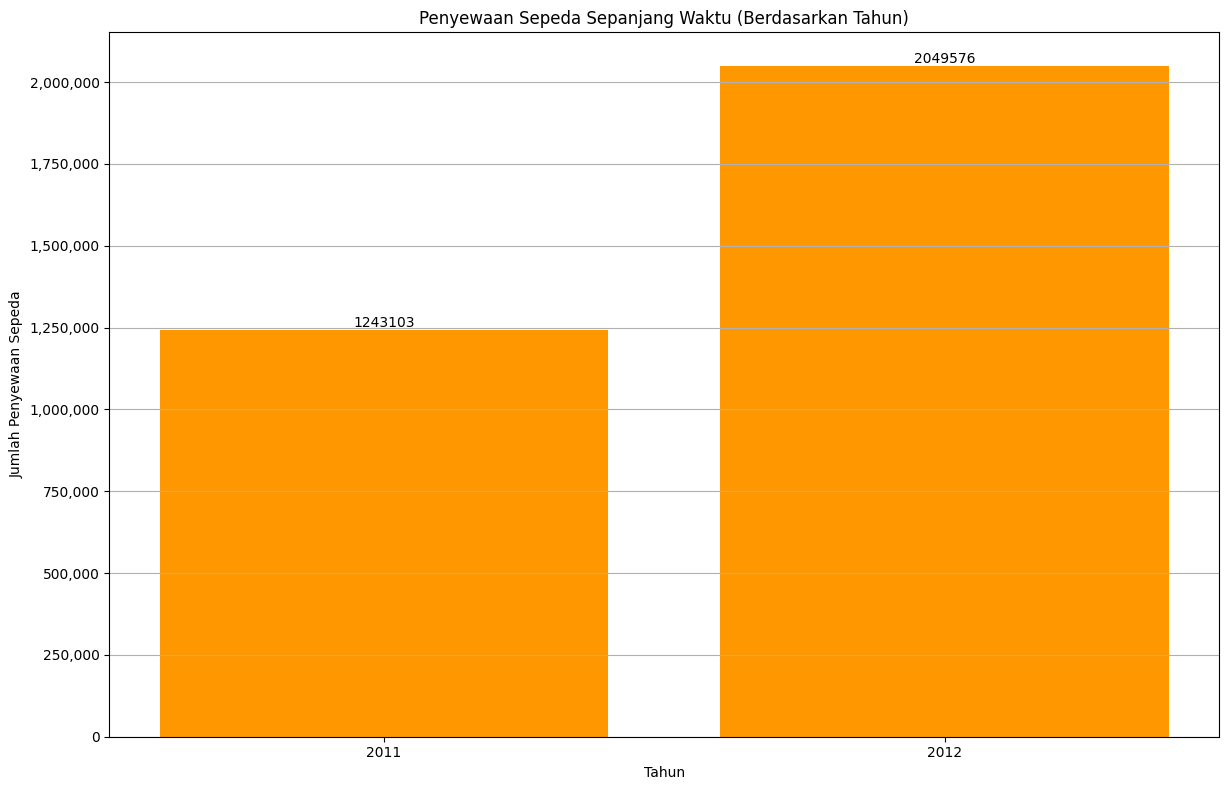

In [24]:
yearly_df = day_df.resample('YE', on='dteday').sum(numeric_only=True)
yearly_df = yearly_df.reset_index()

yearly_df['dteday'] = ["2011", "2012"]

plt.figure(figsize=(12, 8))
plt.bar(yearly_df['dteday'], yearly_df['cnt'], color='#ff9800')

for i in range(len(yearly_df['dteday'])):
    plt.text(i, yearly_df['cnt'][i],
             str(yearly_df['cnt'][i]), ha='center', va='bottom')

plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Waktu (Berdasarkan Tahun)')
plt.grid(axis='y')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Insight**

Dari hasil visualisasi tersebut, beberapa insight yang bisa diperoleh adalah:

1. **Tren Penyewaan Sepeda Meningkat**  
   - Terjadi peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012.  
   - Pada tahun 2011, jumlah penyewaan tercatat sekitar **1.243.103** penyewaan.  
   - Pada tahun 2012, jumlah penyewaan meningkat signifikan menjadi **2.049.576**, atau meningkat lebih dari **64%** dibanding tahun sebelumnya.  

2. **Meningkatnya Popularitas Layanan Penyewaan Sepeda**  
   - Lonjakan signifikan ini bisa mengindikasikan bahwa layanan penyewaan sepeda semakin populer dan diminati oleh masyarakat.  
   - Faktor-faktor yang mungkin berkontribusi terhadap peningkatan ini bisa termasuk peningkatan kesadaran masyarakat akan manfaat bersepeda, peningkatan infrastruktur pendukung (seperti jalur sepeda), atau promosi yang lebih efektif dari penyedia layanan.  

### Pertanyaan 2: Pada bulan apa saja permintaan penyewaan sepeda biasanya mencapai puncaknya?

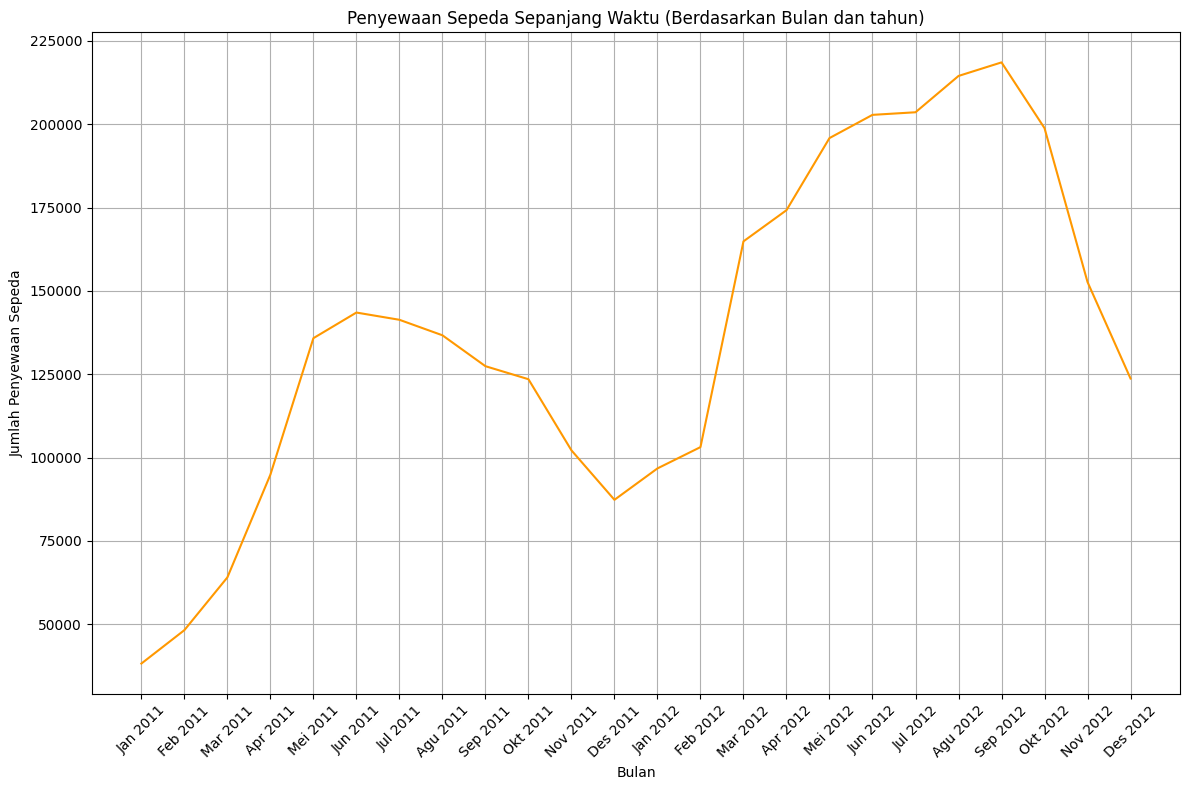

In [25]:
monthly_df = day_df.resample('ME', on='dteday').sum(numeric_only=True)
monthly_df = monthly_df.reset_index()

monthly_df['dteday'] = ["Jan 2011", "Feb 2011", "Mar 2011",
                        "Apr 2011", "Mei 2011", "Jun 2011",
                        "Jul 2011", "Agu 2011", "Sep 2011",
                        "Okt 2011", "Nov 2011", "Des 2011",
                        "Jan 2012", "Feb 2012", "Mar 2012",
                        "Apr 2012", "Mei 2012", "Jun 2012",
                        "Jul 2012", "Agu 2012", "Sep 2012",
                        "Okt 2012", "Nov 2012", "Des 2012"]

plt.figure(figsize=(12, 8))
plt.plot(monthly_df['dteday'], monthly_df['cnt'], color='#ff9800')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Waktu (Berdasarkan Bulan dan tahun)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**

Dari hasil visualisasi penyewaan sepeda berdasarkan bulan dan tahun, beberapa insight yang bisa diperoleh adalah:

1. **Pola Musiman dalam Penyewaan Sepeda**  
   - Terlihat adanya pola musiman di mana jumlah penyewaan sepeda cenderung meningkat pada bulan-bulan tertentu dan menurun pada bulan lainnya.
   - Puncak penyewaan terjadi pada pertengahan hingga akhir tahun, khususnya dari **Mei hingga Oktober**, dengan titik tertinggi sekitar **September - Oktober 2012**.
   - Penyewaan sepeda cenderung rendah di awal tahun (Januari - Februari), terutama pada tahun 2011.

2. **Kenaikan Signifikan di Musim Semi dan Panas**  
   - Peningkatan tajam mulai terjadi sejak **Maret - Mei**, yang mungkin berkaitan dengan kondisi cuaca yang lebih baik (musim semi dan awal musim panas) sehingga lebih banyak orang tertarik untuk bersepeda.
   - Tren ini berulang di kedua tahun (2011 dan 2012), menunjukkan bahwa faktor cuaca dapat mempengaruhi tingkat penyewaan sepeda.

3. **Penurunan di Musim Dingin**  
   - Terjadi penurunan yang signifikan di akhir tahun, terutama pada **November dan Desember**.  
   - Hal ini kemungkinan disebabkan oleh musim dingin yang membuat aktivitas bersepeda menurun.

4. **Peningkatan Keseluruhan dari 2011 ke 2012**  
   - Dibandingkan tahun 2011, jumlah penyewaan di tahun 2012 secara keseluruhan lebih tinggi.  
   - Ini bisa menandakan peningkatan popularitas layanan penyewaan sepeda atau faktor lain seperti perluasan layanan, promosi yang lebih baik, atau meningkatnya kesadaran masyarakat terhadap transportasi ramah lingkungan.

### Pertanyaan 3 : Pada Kuartil apa saja permintaan penyewaan sepeda biasanya mencapai puncaknya?

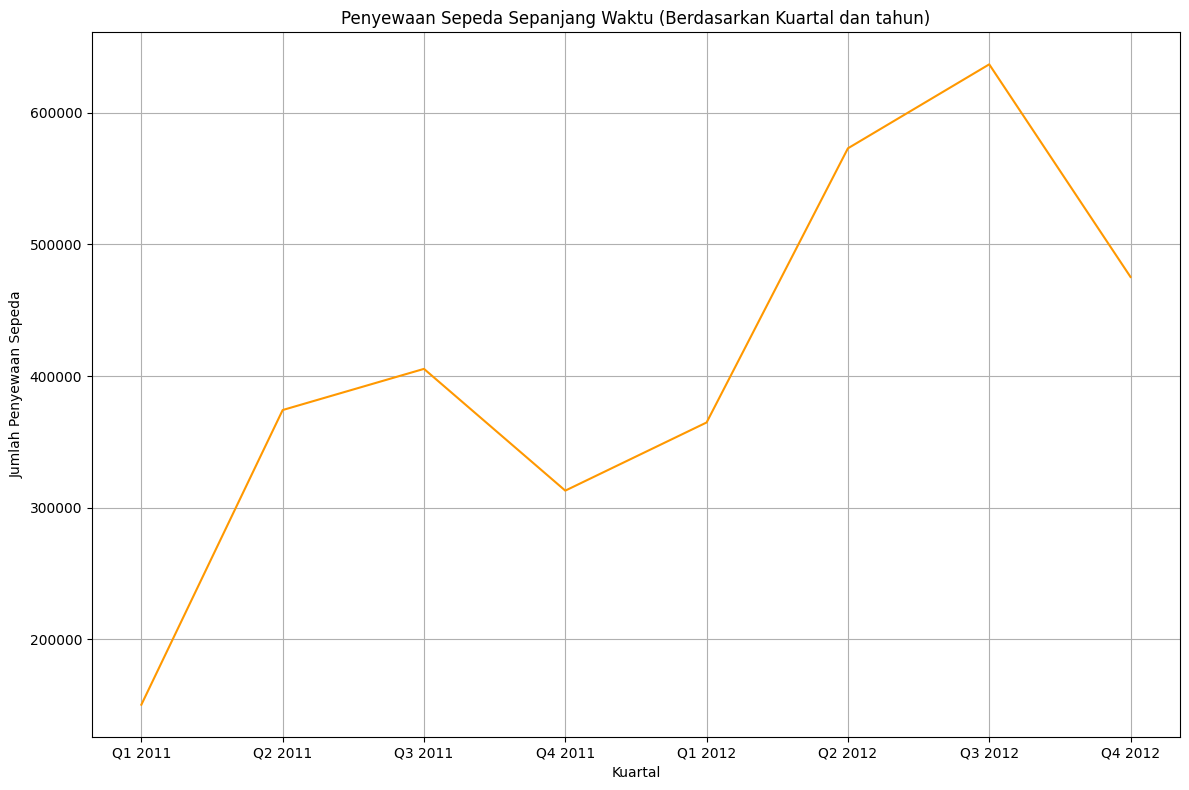

In [26]:
quartilery_df = day_df.resample('QE', on='dteday').sum(numeric_only=True)
quartilery_df = quartilery_df.reset_index()

quartilery_df['dteday'] = ["Q1 2011", "Q2 2011", "Q3 2011", "Q4 2011",
                           "Q1 2012", "Q2 2012", "Q3 2012", "Q4 2012"]

plt.figure(figsize=(12, 8))
plt.plot(quartilery_df['dteday'], quartilery_df['cnt'], color='#ff9800')
plt.xlabel('Kuartal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Waktu (Berdasarkan Kuartal dan tahun)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**

Berdasarkan visualisasi penyewaan sepeda berdasarkan kuartal dan tahun, berikut beberapa insight yang dapat diperoleh:

1. **Pola Musiman yang Konsisten**  
   - Penyewaan sepeda cenderung meningkat pada kuartal **Q2 (April - Juni)** dan **Q3 (Juli - September)** setiap tahunnya.
   - Kuartal **Q1 (Januari - Maret)** dan **Q4 (Oktober - Desember)** memiliki jumlah penyewaan yang lebih rendah.

2. **Peningkatan Signifikan dari Tahun 2011 ke 2012**  
   - Setiap kuartal pada tahun 2012 memiliki jumlah penyewaan yang lebih tinggi dibandingkan kuartal yang sama di tahun 2011.
   - Hal ini mengindikasikan adanya pertumbuhan dalam popularitas layanan penyewaan sepeda atau meningkatnya kebiasaan masyarakat dalam menggunakan sepeda.

3. **Penurunan pada Kuartal 4 di Kedua Tahun**  
   - Setelah mencapai puncaknya pada kuartal **Q3 (Juli - September)**, terjadi penurunan jumlah penyewaan di kuartal **Q4 (Oktober - Desember)**.
   - Kemungkinan penyebabnya adalah musim dingin yang mengurangi minat masyarakat untuk bersepeda.

4. **Lonjakan Signifikan pada Q2 dan Q3 Tahun 2012**  
   - Kuartal **Q2 2012** menunjukkan lonjakan penyewaan yang lebih tinggi dibandingkan Q2 2011, yang berlanjut ke **Q3 2012** sebagai titik tertinggi dari keseluruhan data.
   - Hal ini bisa disebabkan oleh faktor cuaca, promosi, atau peningkatan jumlah sepeda yang tersedia.

### Pertanyaan 4 : Pada bulan apa saja yang memiliki permintaan penyewaan sepeda paling sedikit dan paling banyak?

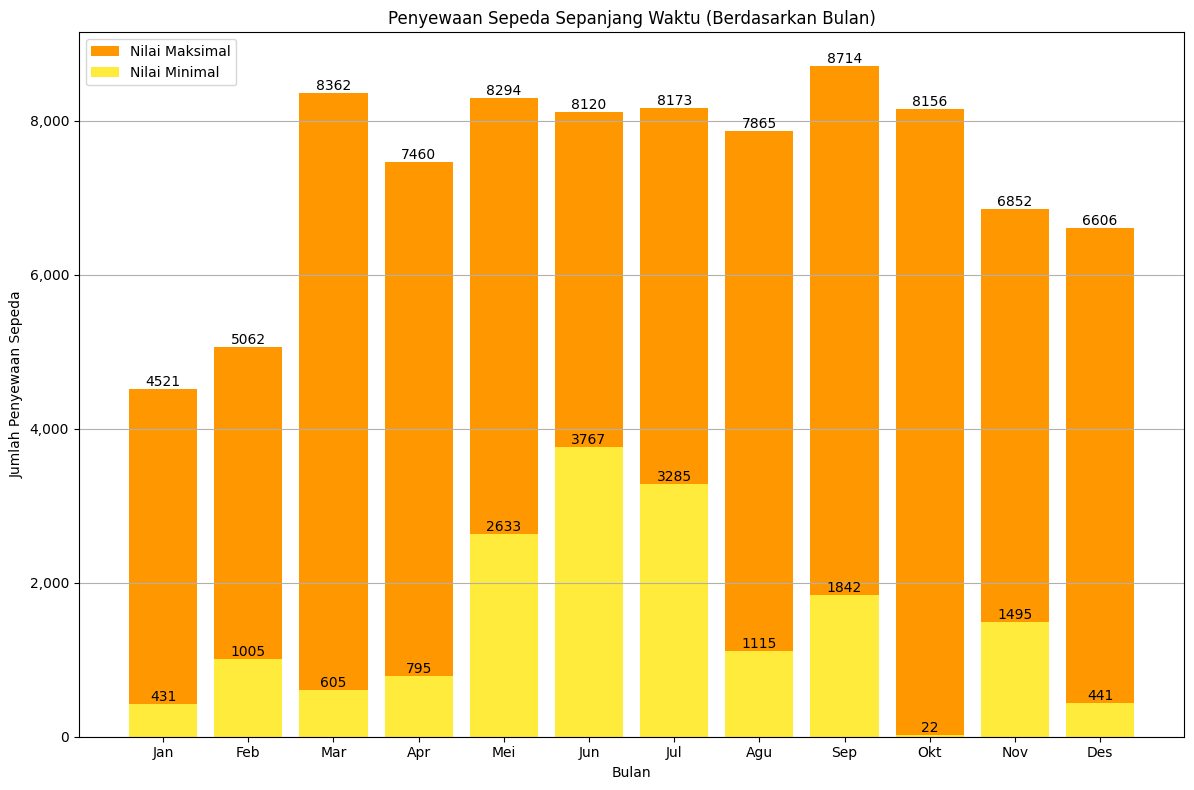

In [27]:
monthly_agg = day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

monthly_agg = monthly_agg.reset_index()

monthly_agg['mnth'] = ["Jan", "Feb", "Mar", "Apr",
                       "Mei", "Jun", "Jul", "Agu",
                       "Sep", "Okt", "Nov", "Des"]

plt.figure(figsize=(12, 8))
plt.bar(monthly_agg['mnth'], monthly_agg['cnt']['max'],
        label= "Nilai Maksimal", color='#ff9800')
plt.bar(monthly_agg['mnth'], monthly_agg['cnt']['min'],
        label= "Nilai Minimal", color='#ffeb3b')

for i in range(len(monthly_agg['mnth'])):
    plt.text(i, monthly_agg['cnt']['max'][i],
             str(monthly_agg['cnt']['max'][i]),
             ha='center', va='bottom')
    plt.text(i, monthly_agg['cnt']['min'][i],
             str(monthly_agg['cnt']['min'][i]),
             ha='center', va='bottom')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Waktu (Berdasarkan Bulan)')
plt.legend(loc="upper left")
plt.grid(axis='y')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Insight**

Berdasarkan visualisasi penyewaan sepeda berdasarkan bulan dengan nilai maksimal dan minimal, berikut beberapa insight yang dapat diperoleh:

1. **Pola Musiman yang Jelas**  
   - Penyewaan sepeda tertinggi terjadi pada bulan **Mei hingga September**, dengan puncaknya pada bulan **September (8714 penyewaan)**.  
   - Penyewaan terendah terjadi di bulan **Januari (431 minimal) dan Oktober (22 minimal)**, menunjukkan musim dingin atau faktor cuaca mempengaruhi permintaan.

2. **Variasi yang Besar Antara Nilai Maksimal dan Minimal**  
   - Di bulan **Juni dan Juli**, terdapat perbedaan besar antara jumlah penyewaan maksimal dan minimal. Misalnya, pada bulan Juni, penyewaan maksimal mencapai **8120**, tetapi minimalnya **3767**.  
   - Hal ini menunjukkan bahwa ada faktor tertentu (mungkin cuaca, hari libur, atau tren harian) yang menyebabkan fluktuasi dalam penyewaan sepeda.

3. **Lonjakan Signifikan di Musim Semi dan Panas**  
   - Dari bulan **Maret ke Mei**, terjadi peningkatan drastis dalam jumlah penyewaan.  
   - Hal ini mengindikasikan bahwa ketika cuaca mulai membaik setelah musim dingin, lebih banyak orang memilih bersepeda.

4. **Penurunan Tajam di Akhir Tahun**  
   - Dari **September ke Desember**, jumlah penyewaan sepeda mengalami penurunan secara bertahap.  
   - Hal ini kemungkinan besar disebabkan oleh cuaca dingin yang mengurangi minat masyarakat untuk bersepeda.

### Pertanyaan 5 : Pada hari apa saja yang memiliki permintaan penyewaan sepeda paling sedikit dan paling banyak?

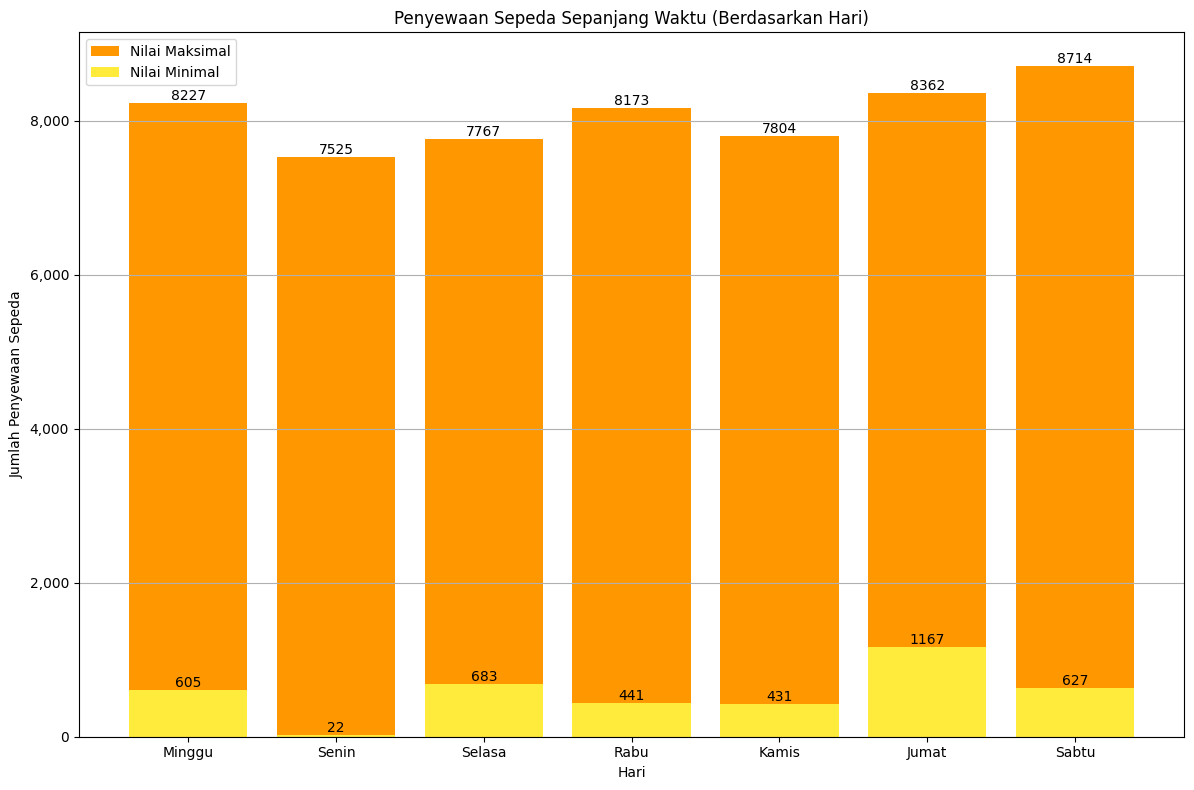

In [28]:
dayly_agg = day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

dayly_agg = dayly_agg.reset_index()

dayly_agg['weekday'] = ["Minggu", "Senin", "Selasa",
                        "Rabu", "Kamis", "Jumat", "Sabtu"]

plt.figure(figsize=(12, 8))
plt.bar(dayly_agg['weekday'], dayly_agg['cnt']['max'],
        label= "Nilai Maksimal", color='#ff9800')
plt.bar(dayly_agg['weekday'], dayly_agg['cnt']['min'],
        label= "Nilai Minimal", color='#ffeb3b')

for i in range(len(dayly_agg['weekday'])):
    plt.text(i, dayly_agg['cnt']['max'][i],
             str(dayly_agg['cnt']['max'][i]), ha='center', va='bottom')
    plt.text(i, dayly_agg['cnt']['min'][i],
             str(dayly_agg['cnt']['min'][i]), ha='center', va='bottom')

plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Waktu (Berdasarkan Hari)')
plt.legend(loc="upper left")
plt.grid(axis='y')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Insight**

Berdasarkan visualisasi penyewaan sepeda berdasarkan hari, berikut beberapa insight yang dapat diperoleh:

1. **Penyewaan Tertinggi Terjadi di Akhir Pekan**  
   - Hari **Sabtu (8714 penyewaan maksimal)** memiliki jumlah penyewaan tertinggi, diikuti oleh **Jumat (8362)** dan **Minggu (8227)**.  
   - Ini menunjukkan bahwa lebih banyak orang menyewa sepeda saat akhir pekan, kemungkinan besar untuk rekreasi atau aktivitas santai.

2. **Penyewaan Terendah Terjadi pada Hari Senin**  
   - Hari **Senin memiliki penyewaan minimal hanya 22**, jauh lebih rendah dibandingkan hari lainnya.  
   - Kemungkinan besar karena awal pekan kerja, sehingga penggunaan sepeda untuk aktivitas rekreasi berkurang.

3. **Pola yang Konsisten pada Hari Kerja**  
   - Penyewaan sepeda cukup stabil pada hari **Selasa hingga Kamis**, dengan jumlah maksimal berkisar antara **7525 - 8173**.  
   - Perbedaan antara penyewaan maksimal dan minimal tidak sebesar pada akhir pekan, menunjukkan bahwa mungkin digunakan untuk aktivitas rutin seperti pergi bekerja atau sekolah.

4. **Variasi Besar antara Nilai Maksimal dan Minimal**  
   - Pada hari Jumat, terdapat perbedaan signifikan antara penyewaan maksimal (8362) dan minimal (1167), yang bisa jadi menunjukkan transisi dari hari kerja ke akhir pekan.  
   - Senin memiliki selisih yang ekstrem antara penyewaan maksimal dan minimal, yang menunjukkan bahwa ada hari tertentu dengan hampir tidak ada penyewaan.

### Pertanyaan 6 : Pada jam berapa saja yang memiliki permintaan penyewaan sepeda paling sedikit dan paling banyak?

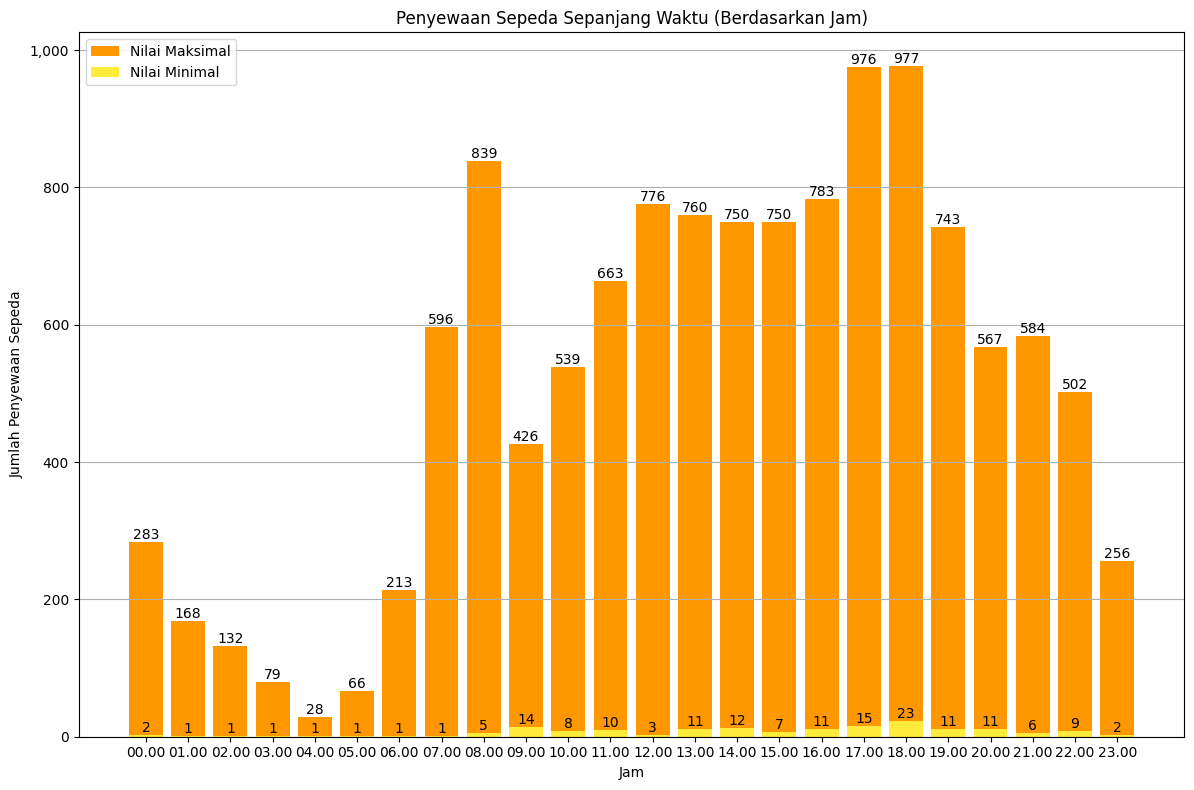

In [29]:
hourly_agg = hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

hourly_agg = hourly_agg.reset_index()
hourly_agg['hr'] = ["00.00", "01.00", "02.00", "03.00",
                    "04.00", "05.00", "06.00", "07.00",
                    "08.00", "09.00", "10.00", "11.00",
                    "12.00", "13.00", "14.00", "15.00",
                    "16.00", "17.00", "18.00", "19.00",
                    "20.00", "21.00", "22.00", "23.00"]

plt.figure(figsize=(12, 8))
plt.bar(hourly_agg['hr'], hourly_agg['cnt']['max'],
        label= "Nilai Maksimal", color='#ff9800')
plt.bar(hourly_agg['hr'], hourly_agg['cnt']['min'],
        label= "Nilai Minimal", color='#ffeb3b')

for i in range(len(hourly_agg['hr'])):
    plt.text(i, hourly_agg['cnt']['max'][i],
             str(hourly_agg['cnt']['max'][i]), ha='center', va='bottom')
    plt.text(i, hourly_agg['cnt']['min'][i],
             str(hourly_agg['cnt']['min'][i]), ha='center', va='bottom')

plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Waktu (Berdasarkan Jam)')
plt.legend(loc="upper left")
plt.grid(axis='y')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Insight**

Berdasarkan visualisasi penyewaan sepeda berdasarkan jam, berikut beberapa insight yang dapat diperoleh:

1. **Puncak Penyewaan Terjadi pada Pagi dan Sore Hari**  
   - Penyewaan tertinggi terjadi pada **jam 17:00 dan 18:00** dengan jumlah penyewaan mencapai **976 dan 977**.  
   - Ini menunjukkan bahwa banyak orang menggunakan sepeda pada jam pulang kerja atau sekolah.  

2. **Lonjakan Penyewaan di Pagi Hari**  
   - Peningkatan signifikan mulai terlihat pada jam **07:00 (596 penyewaan)**, lalu meningkat pesat hingga **08:00 (839 penyewaan)**.  
   - Ini bisa dikaitkan dengan orang yang menggunakan sepeda untuk berangkat kerja atau sekolah.  

3. **Penyewaan Stabil di Siang Hari**  
   - Dari **jam 12:00 hingga 16:00**, penyewaan cukup stabil di kisaran **750-783 penyewaan** per jam.  
   - Kemungkinan ini merupakan waktu yang digunakan untuk aktivitas santai, olahraga, atau wisata.  

4. **Penyewaan Menurun Drastis di Malam Hari**  
   - Setelah jam 19:00, jumlah penyewaan mulai menurun secara signifikan, dengan angka **502 penyewaan pada jam 22:00** dan hanya **2 penyewaan pada jam 23:00**.  
   - Ini wajar karena malam hari bukan waktu yang umum untuk bersepeda.  

5. **Aktivitas Minimal pada Dini Hari**  
   - Dari **jam 00:00 hingga 05:00**, jumlah penyewaan sangat rendah, dengan angka minimal **1-2 penyewaan** pada beberapa jam.  
   - Ini menunjukkan bahwa hampir tidak ada aktivitas penyewaan pada waktu tersebut.  

### Pertanyaan 7 : Pada musim apa saja yang memiliki permintaan penyewaan sepeda paling sedikit dan paling banyak?

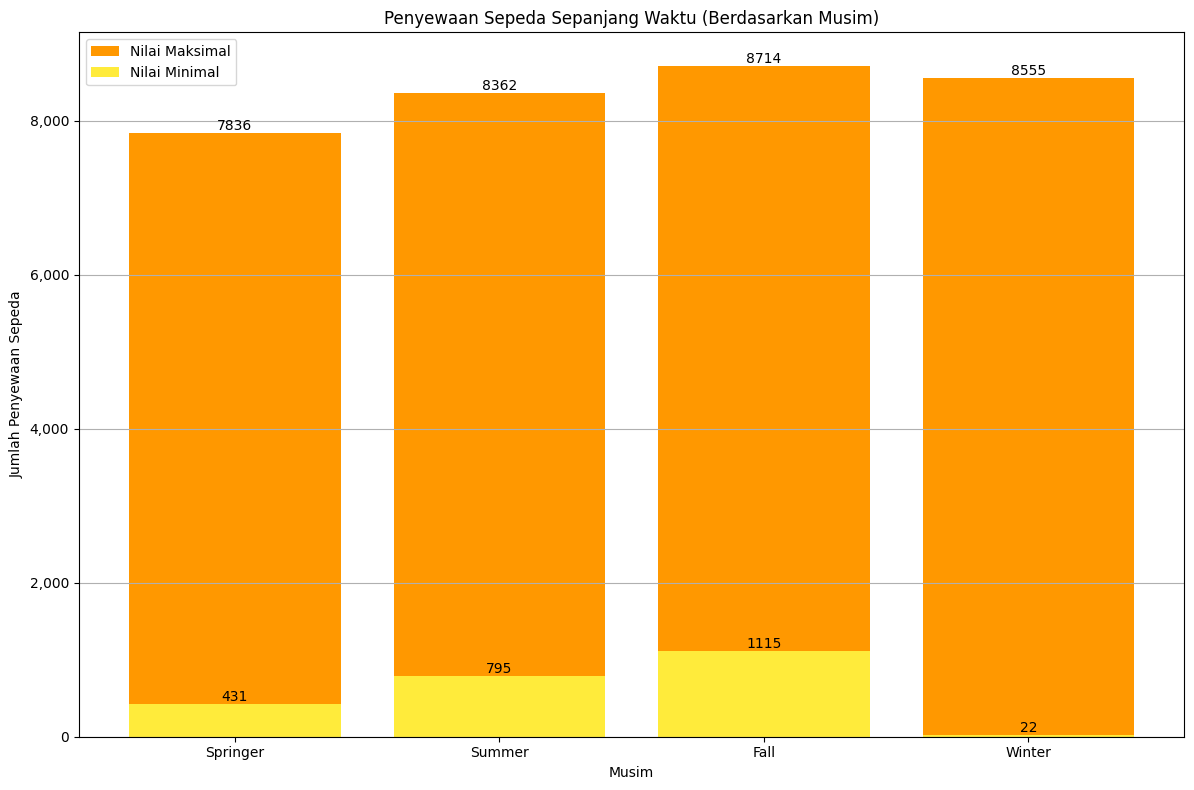

In [30]:
seasonly_df = day_df.groupby(by="season", observed=False).agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

seasonly_df = seasonly_df.reset_index()

seasonly_df['season'] = ["Springer", "Summer", "Fall", "Winter"]
plt.figure(figsize=(12, 8))
plt.bar(seasonly_df['season'], seasonly_df['cnt']['max'],
        label= "Nilai Maksimal", color='#ff9800')
plt.bar(seasonly_df['season'], seasonly_df['cnt']['min'],
        label= "Nilai Minimal", color='#ffeb3b')

for i in range(len(seasonly_df['season'])):
    plt.text(i, seasonly_df['cnt']['max'][i],
             str(seasonly_df['cnt']['max'][i]), ha='center', va='bottom')
    plt.text(i, seasonly_df['cnt']['min'][i],
             str(seasonly_df['cnt']['min'][i]), ha='center', va='bottom')

plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Waktu (Berdasarkan Musim)')
plt.legend(loc="upper left")
plt.grid(axis='y')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Insight**

Berdasarkan visualisasi penyewaan sepeda berdasarkan musim, berikut beberapa insight yang dapat diperoleh:

1. **Penyewaan Tertinggi pada Musim Gugur (Fall)**  
   - Jumlah penyewaan tertinggi terjadi pada musim **gugur (Fall) dengan 8.714 penyewaan**.  
   - Ini mungkin disebabkan oleh cuaca yang lebih nyaman untuk bersepeda dibanding musim panas yang panas atau musim dingin yang dingin.  

2. **Musim Panas (Summer) dan Musim Dingin (Winter) Juga Memiliki Angka Tinggi**  
   - **Musim panas memiliki 8.362 penyewaan**, yang juga cukup tinggi, kemungkinan karena liburan dan cuaca cerah.  
   - **Musim dingin memiliki 8.555 penyewaan**, tetapi nilai minimumnya sangat kecil (hanya 22 penyewaan), yang menunjukkan bahwa pada hari-hari tertentu penyewaan hampir tidak terjadi, mungkin karena cuaca ekstrem seperti hujan atau salju.  

3. **Musim Semi (Spring) Memiliki Penyewaan Terendah**  
   - Jumlah penyewaan di musim semi adalah **7.836**, yang lebih rendah dibanding musim lainnya.  
   - Ini mungkin disebabkan oleh cuaca yang masih belum stabil, dengan kemungkinan hujan lebih sering terjadi.  

4. **Variasi Nilai Minimal yang Signifikan**  
   - **Musim dingin memiliki nilai minimum terendah (22 penyewaan),** menunjukkan bahwa ada hari-hari di mana hampir tidak ada penyewaan.  
   - **Musim gugur memiliki nilai minimum tertinggi (1.115 penyewaan),** yang berarti bahwa pada hari-hari tersibuk sekalipun, masih ada cukup banyak orang yang menyewa sepeda.

### Pertanyaan 8 : Pengaruh permintaan penyewaan sepeda berdasarkan cuaca?

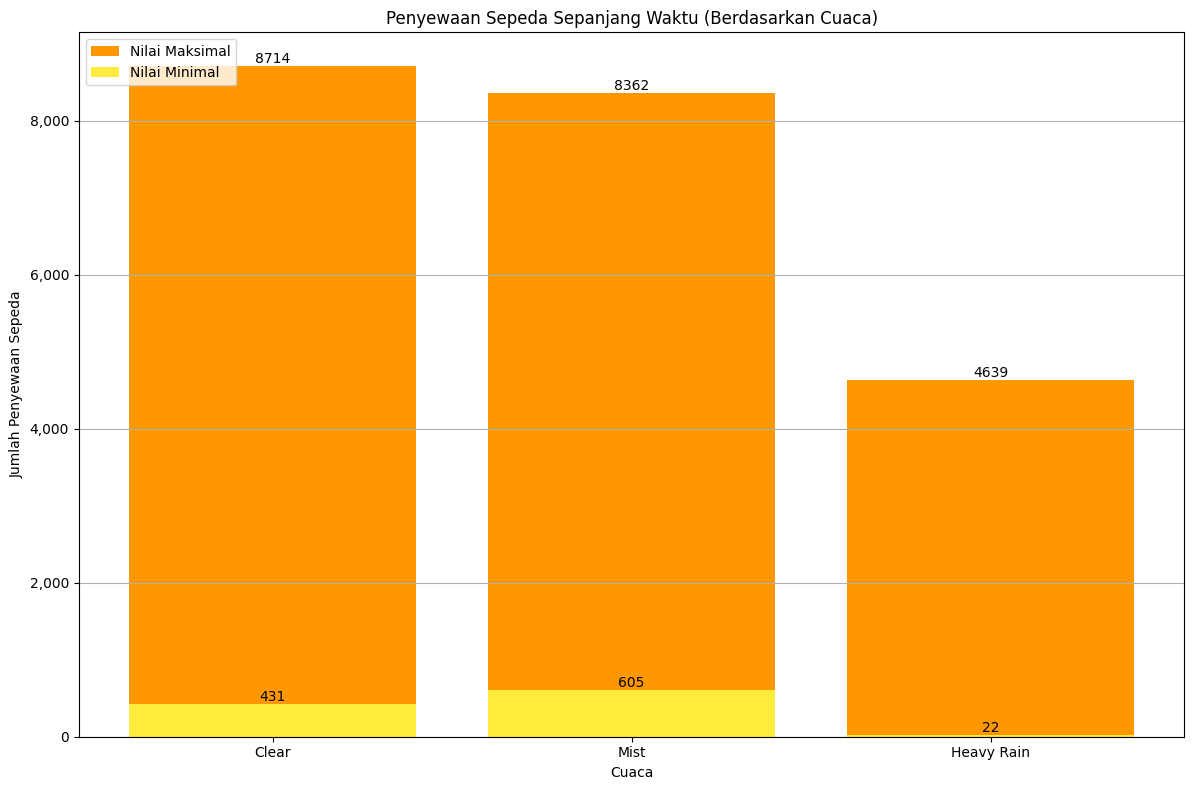

In [31]:
weather_agg = day_df.groupby(by="weathersit", observed=False).agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

weather_agg = weather_agg.reset_index()

weather_agg["weathersit"] = ["Clear", "Mist", "Heavy Rain"]
plt.figure(figsize=(12, 8))
plt.bar(weather_agg['weathersit'], weather_agg['cnt']['max'],
        label= "Nilai Maksimal", color='#ff9800')
plt.bar(weather_agg['weathersit'], weather_agg['cnt']['min'],
        label= "Nilai Minimal", color='#ffeb3b')

for i in range(len(weather_agg['weathersit'])):
    plt.text(i, weather_agg['cnt']['max'][i],
             str(weather_agg['cnt']['max'][i]), ha='center', va='bottom')
    plt.text(i, weather_agg['cnt']['min'][i],
             str(weather_agg['cnt']['min'][i]), ha='center', va='bottom')

plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Waktu (Berdasarkan Cuaca)')
plt.grid(axis='y')
plt.tight_layout()
plt.legend(loc="upper left")
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Insight**

Berdasarkan visualisasi penyewaan sepeda berdasarkan kondisi cuaca, berikut beberapa insight yang dapat diperoleh:

1. **Cuaca Cerah (Clear) Menjadi Favorit**  
   - Penyewaan tertinggi terjadi saat cuaca **cerah (Clear) dengan 8.714 penyewaan**.  
   - Ini menunjukkan bahwa orang lebih cenderung menyewa sepeda saat cuaca mendukung, tidak ada gangguan hujan atau kabut.  

2. **Kabut (Mist) Tidak Terlalu Mempengaruhi Penyewaan**  
   - Penyewaan saat cuaca **berkabut (Mist) mencapai 8.362**, hanya sedikit lebih rendah dibandingkan cuaca cerah.  
   - Kemungkinan besar, kabut ringan tidak menghalangi pengguna untuk menyewa sepeda.  

3. **Hujan Lebat (Heavy Rain) Menurunkan Penyewaan Secara Drastis**  
   - Saat hujan lebat, penyewaan turun drastis hingga **4.639**, hampir setengah dari jumlah penyewaan pada kondisi cerah.  
   - Nilai minimum saat hujan lebat sangat rendah, **hanya 22 penyewaan**, menunjukkan bahwa pada hari-hari tertentu hampir tidak ada yang menyewa sepeda.  
   - Ini bisa disebabkan oleh kondisi jalan yang licin, berkurangnya visibilitas, atau ketidaknyamanan saat bersepeda dalam hujan.

## Analisis Lanjutan (Opsional)
### Binning `temp` in `day_df`

In [32]:
# Define bins for temperature
temp_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
temp_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'temp_category' based on the bins
day_df['temp_category'] = pd.cut(day_df['temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)

Kode ini mengelompokkan suhu (`temp`) ke dalam 5 kategori: **Very Low, Low, Medium, High, Very High** menggunakan `pd.cut()`.  

**Insight:**  
- **Mempermudah Analisis & Visualisasi** – Memahami tren penyewaan berdasarkan kategori suhu.  
- **Membantu Identifikasi Pola** – Misalnya, apakah penyewaan lebih tinggi pada suhu **Medium - High** dibanding **Very Low atau Very High**.  
- **Bisa Digunakan untuk Model Prediksi** – Kategori suhu dapat menjadi fitur tambahan dalam machine learning.  

### Pertanyaan 9 : Saat suhu temperatur apa yang mempengaruhi permintaan penyewaan sepeda? (Result Binning)

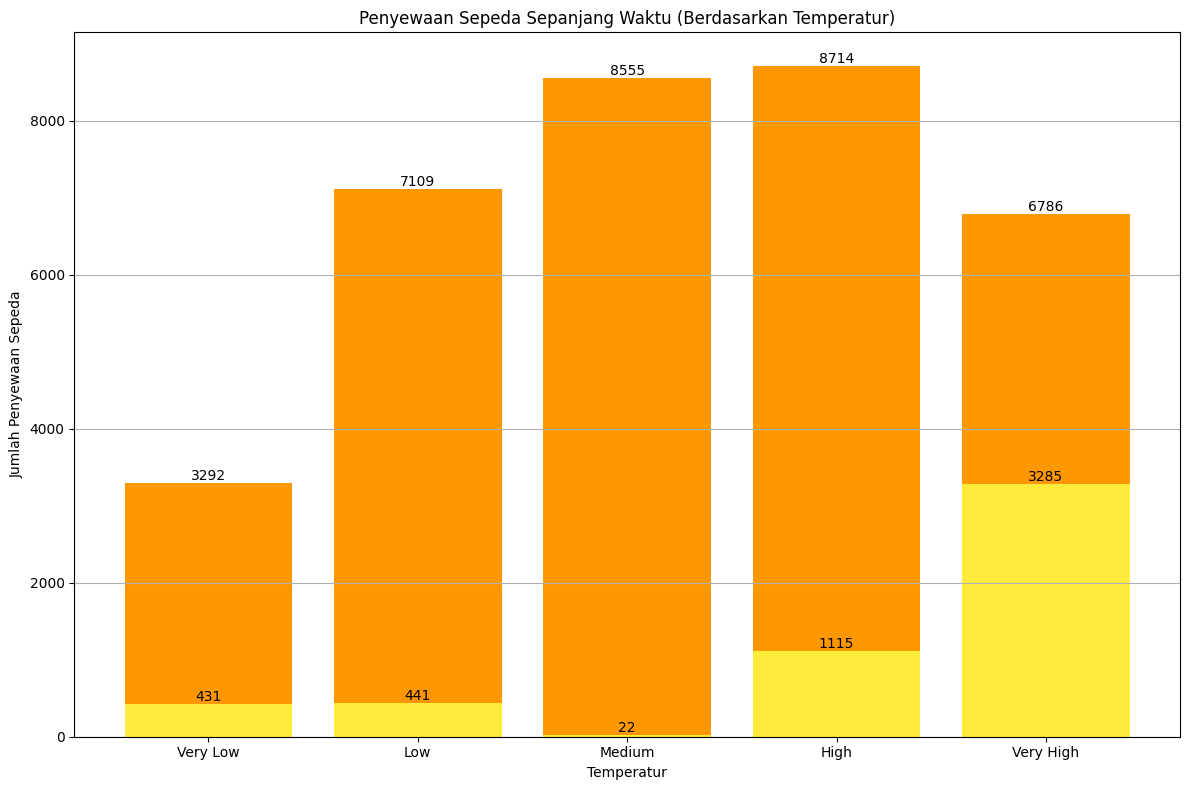

In [33]:
temp_df = day_df.groupby(by="temp_category", observed=False).agg({
    "instant": "nunique",
    "cnt": ["max", "min"]
})

temp_df = temp_df.reset_index()

temp_df['temp_category'] = ["Very Low", "Low",
                            "Medium", "High", "Very High"]

plt.figure(figsize=(12, 8))
plt.bar(temp_df['temp_category'], temp_df['cnt']['max'],
        label= "Nilai Maksimal", color='#ff9800')
plt.bar(temp_df['temp_category'], temp_df['cnt']['min'],
        label= "Nilai Minimal", color='#ffeb3b')

for i in range(len(temp_df['temp_category'])):
    plt.text(i, temp_df['cnt']['max'][i],
             str(temp_df['cnt']['max'][i]), ha='center', va='bottom')
    plt.text(i, temp_df['cnt']['min'][i],
             str(temp_df['cnt']['min'][i]), ha='center', va='bottom')

plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Waktu (Berdasarkan Temperatur)')
plt.grid(axis='y')
plt.tight_layout()

**Insight**

Berdasarkan visualisasi penyewaan sepeda berdasarkan suhu yang sudah dilakukan binning sebelumnya, berikut beberapa insight yang dapat diperoleh:
1. **Penyewaan Tertinggi pada Temperatur Medium & High**  
   - Temperatur **Medium** (0.4 - 0.6) dan **High** (0.6 - 0.8) menunjukkan jumlah penyewaan tertinggi, dengan puncaknya di **8714 penyewaan**.  
   - Ini menunjukkan bahwa cuaca hangat cenderung meningkatkan minat orang untuk menyewa sepeda.  

2. **Penyewaan Rendah pada Temperatur Very Low & Very High**  
   - Temperatur **Very Low** (≤0.2) dan **Very High** (≥0.8) menunjukkan lebih sedikit penyewaan.  
   - **Very Low** bisa disebabkan oleh cuaca dingin yang tidak nyaman.  
   - **Very High** mungkin membuat pengguna menghindari bersepeda karena terlalu panas.  

3. **Perbedaan Nilai Maksimum & Minimum**  
   - Saat temperatur **Very High**, nilai minimum penyewaan lebih tinggi dibanding kategori lain, menunjukkan bahwa ada kelompok tertentu yang tetap aktif bersepeda meski suhu tinggi.

### Convert Main_df to csv

In [34]:
main_df.to_csv("main_df.csv")

**Insight**
- Kode `main_df.to_csv("main_df.csv")` menyimpan DataFrame main_df ke dalam file CSV bernama main_df.csv. Ini berguna untuk menyimpan hasil analisis, membagikan data, atau menggunakannya kembali tanpa harus memproses ulang.



## Conclusion

- Conclusion pertanyaan 1 : Visualisasi penyewaan sepeda menunjukkan peningkatan signifikan dari **1.243.103** penyewaan pada `2011` menjadi **2.049.576** pada `2012`. Kenaikan ini menandakan bahwa terjadi kenaikan peminat dalam kurun 1 tahun.

 **Rekomendasi:**
  - Dapat dilakukan analisis lebih lanjut untuk memahami penyebab peningkatan ini, misalnya dengan melihat faktor musiman, cuaca, atau kebijakan pemerintah terkait transportasi ramah lingkungan.
  - Bisa juga dilakukan eksplorasi terhadap tren bulanan atau harian untuk mendapatkan wawasan lebih dalam mengenai pola penyewaan sepeda.

- Conclusion pertanyaan 2 : Penyewaan sepeda meningkat dari awal 2011 hingga pertengahan 2012, mencapai puncak di pertengahan 2012. Namun, terjadi penurunan di akhir 2012, kemungkinan akibat faktor musiman atau kebijakan.

 **Rekomendasi:**
  - Optimalisasi layanan pada bulan-bulan dengan permintaan tinggi seperti Mei - Oktober dengan menambah jumlah sepeda, memperbaiki infrastruktur, atau memberikan promosi.
  - Strategi untuk meningkatkan penyewaan di bulan-bulan sepi, misalnya dengan memberikan diskon pada musim dingin atau menawarkan fasilitas tambahan seperti perlengkapan untuk cuaca dingin.
  - Analisis lebih lanjut terkait faktor lain yang mempengaruhi tren ini, seperti cuaca, hari kerja vs. akhir pekan, dan kebijakan transportasi di daerah tersebut.

- Conclusion pertanyaan 3 : Penyewaan sepeda berfluktuasi dari Q1 2011 - Q4 2012, memuncak di Q2 2012 dengan **600.000+** penyewaan sebelum turun di Q4, kemungkinan akibat faktor musiman.

  **Rekomendasi:**
  - Optimalkan layanan pada kuartal Q2 dan Q3, seperti menambah stok sepeda, promosi aktif, atau penyediaan fasilitas tambahan.
  - Strategi peningkatan di Q1 dan Q4, misalnya dengan diskon musim dingin atau layanan tambahan seperti penyewaan perlengkapan bersepeda di cuaca dingin.
  - Lakukan analisis tambahan untuk memahami faktor yang berkontribusi terhadap peningkatan pesat di Q2 dan Q3 2012 agar strategi bisnis lebih efektif di tahun berikutnya.

- Conclusion pertanyaan 4 : Visualisasi menunjukkan jumlah penyewaan sepeda per bulan, dengan puncak tertinggi pada bulan `September` dengan **8.714** penyewaan dan permintaan penyewaan paling sedikit terdapat pada bulan `Oktober` dengan **22** penyewaan.

  **Rekomendasi:**
  - Optimalkan layanan di bulan Mei - September, seperti menambah stok sepeda dan promosi untuk menarik lebih banyak pelanggan.
  - Strategi di musim dingin, seperti menawarkan diskon atau layanan tambahan seperti perlengkapan musim dingin agar tetap menarik bagi pengguna.
  - Analisis lebih lanjut terhadap fluktuasi harian, terutama bulan dengan perbedaan besar antara nilai maksimal dan minimal, untuk mengetahui faktor yang memengaruhi tren harian.

- Conclusion pertanyaan 5 : Visualisasi menunjukkan jumlah penyewaan sepeda berdasarkan hari, dengan puncak tertinggi pada hari `Sabtu` dengan **8.714** penyewaan dan permintaan penyewaan paling sedikit terdapat pada hari `Senin` dengan **22** penyewaan.

  **Rekomendasi:**
  - Optimalkan layanan di akhir pekan, misalnya dengan menambah jumlah sepeda yang tersedia atau menawarkan paket promosi untuk penyewaan jangka panjang.
  - Analisis lebih lanjut tentang pola penggunaan di hari kerja, terutama Senin, untuk memahami mengapa terjadi penyewaan yang sangat rendah.
  - Menawarkan promo di hari kerja untuk meningkatkan penyewaan pada Senin-Kamis, seperti diskon untuk pelanggan tetap atau penyewaan pagi hari dengan harga lebih murah.

- Conclusion pertanyaan 6 : Visualisasi menunjukkan jumlah penyewaan sepeda berdasarkan jam, dengan puncak tertinggi pada jam `18.00` dengan **977** penyewaan dan permintaan paling sedikit terdapat pada jam `01.00 - 07.00` dengan **1** penyewaan.

  **Rekomendasi:**
  - Optimalkan layanan di jam sibuk (07:00 - 08:00 dan 17:00 - 18:00) dengan memastikan jumlah sepeda cukup dan tersedia di lokasi strategis.
  - Pertimbangkan promo atau diskon pada jam siang hari (12:00 - 16:00) untuk menarik lebih banyak pelanggan pada jam non-sibuk.
  - Kurangi operasional atau optimalkan biaya perawatan di jam tengah malam karena aktivitas penyewaan sangat minim.

- Conclusion pertanyaan 7 : Visualisasi menunjukkan jumlah penyewaan sepeda berdasarkan musim dengan puncak tertinggi pada musim `Fall/Musim gugur` dengan **8.714** penyewaan dan permintaan paling sedikit terdapat pada musim `Winter/Musim dingin` dengan **22** penyewaan.

  **Rekomendasi:**
  - Meningkatkan stok sepeda pada musim gugur karena permintaan paling tinggi.
  - Mempromosikan penyewaan pada musim semi dengan diskon atau event bersepeda untuk meningkatkan jumlah pengguna.
  - Menyesuaikan layanan pada musim dingin seperti memberikan opsi sewa jangka panjang atau menyiapkan sepeda yang lebih cocok untuk cuaca dingin.

- Conclusion pertanyaan 8 : Visualisasi menunjukkan jumlah penyewaan sepeda berdasarkan cuaca dengan puncak tertinggi pada saat cuaca `Clear/Cerah` dengan **8.714** penyewaan dan permintaan paling sedikit terdapat pada saat cuaca `Heavy Rain/Hujan deras` dengan **22** penyewaan.

  **Rekomendasi:**
  - Meningkatkan promosi pada hari cerah, seperti diskon atau event bersepeda.
  - Menyiapkan layanan penyewaan yang lebih fleksibel saat hujan, seperti sepeda dengan pelindung hujan atau penyewaan jangka pendek yang lebih murah.
  - Menyediakan fasilitas seperti jas hujan atau tempat berteduh di titik penyewaan untuk meningkatkan kenyamanan pengguna pada kondisi cuaca yang kurang ideal.

- Conclusion pertanyaan 9 : Visualisasi menunjukkan jumlah penyewaan sepeda berdasarkan suhu temperatur dengan puncak tertinggi pada suhu `High` dengan **8.714** penyewaan dan permintaan paling sedikit terdapat pada suhu `Medium` dengan **22** penyewaan. Ini juga menyatakan bahwa suhu yang nyaman (Medium & High) meningkatkan penyewaan sepeda, sementara suhu ekstrem (sangat dingin atau panas) cenderung menurunkan jumlah penyewaan.

  **Rekomendasi:**
  - Diskon & Insentif saat suhu Very Low dan Very High untuk menarik lebih banyak pengguna.
  - Fasilitas Penunjang, seperti stasiun air minum saat panas dan penutup tangan saat dingin.
  - Edukasi & Kampanye, beri tips keselamatan bersepeda di berbagai suhu.
  - Tambahkan Sepeda pada suhu dengan permintaan tinggi (Medium & High).
  - Prediksi & Penyesuaian Stok berdasarkan tren cuaca untuk optimalisasi layanan.